<a href="https://colab.research.google.com/github/MuhammadHammad-git/PCA_and_K_Means_Clustering/blob/main/PCA_and_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QUESTION # 1

In [ ]:
import cv2
import numpy as np
from base64 import b64encode
import tempfile
from IPython.display import HTML
import imageio

To implement PCA on a sample video provided in the folder and convert it into frames, follow these steps:

Read the video file using the given function.

In [ ]:
video = '/content/try.mp4'
mp4 = open(video,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""<video width=400 controls><source src="%s" type="video/mp4"></video>""" % data_url)
with tempfile.NamedTemporaryFile(suffix=".mp4") as tmpfile:
    tmpfile.write(mp4)
    tmpfile.flush()

    vid = imageio.get_reader(tmpfile.name, "ffmpeg")


## Task 1
Convert Each frame to Gray Scale

Loop through the video frames and convert each RGB image to grayscale. Store the grayscale images in a list.

In [ ]:
frames = []
for frame in vid:
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    frames.append(gray)


## Task 2

Using built in PCA

In [ ]:
X = np.array(frames)
X = X.reshape(X.shape[0], -1)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


In [ ]:
print("Variance explained by each principal component:", pca.explained_variance_ratio_)


Variance explained by each principal component: [0.83100879 0.00733738]


To visualize the reduced dimensionality of the video frames using PCA, plotting the first two principal components against each other using a scatter plot.

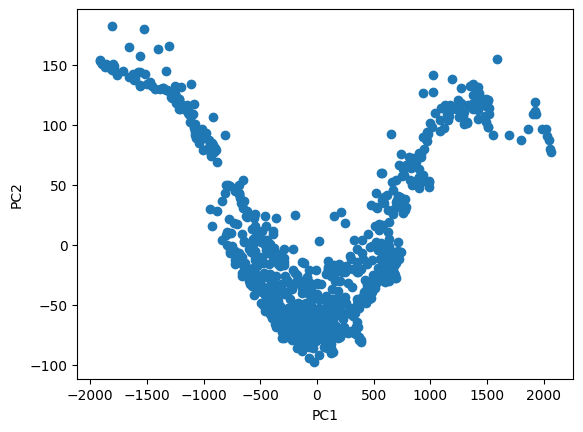

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


# QUESTION # 2

## Task 1

Using k-means clustering on the iris dataset

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
iris = load_iris()
X = iris.data
y = iris.target
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Task 2

Computing the eigenvalues and eigenvectors

In [ ]:
cov = np.cov(X.T)
eig_val, eig_vec = np.linalg.eig(cov)


Computing the confusion matrix of the k-means clustering using the sklearn.metrics.confusion_matrix() function.


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, kmeans.labels_)


array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]])

## Task 3

Checking the eigenvectors corresponding to the 2nd least eigenvalue
Then cmparing there signs with the k-means clusters using the sign function.

In [ ]:
second_least_eig_vec = eig_vec[:, 1]
signs = np.sign(second_least_eig_vec)
print(signs)
print(kmeans.labels_)


[-1. -1.  1.  1.]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
